# Predicting Road Accident Risk

In [ ]:
# importing Required Libraries and Load Data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATASET

In [ ]:
# importing the data set
try:
    df = pd.read_csv("Raw_Data/train.csv")
except:
    df = pd.read_csv("train.csv")

# display the first five row of the dataframe
df.head()


EXPLORATORY DATA ANALYSIS

In [ ]:
# display the shape of the dataframe
df.info()

In [164]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
boolean_cols = df.select_dtypes(include=["bool"]).columns

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Boolean:", boolean_cols)
print("shape of the dataframe:", df.shape)

Numerical: Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')
Categorical: Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')
Boolean: Index(['road_signs_present', 'public_road', 'holiday', 'school_season'], dtype='object')
shape of the dataframe: (517754, 14)


In [ ]:
df[numerical_cols].describe()

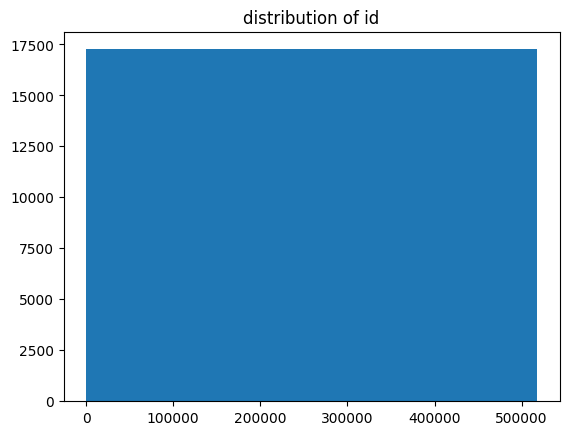

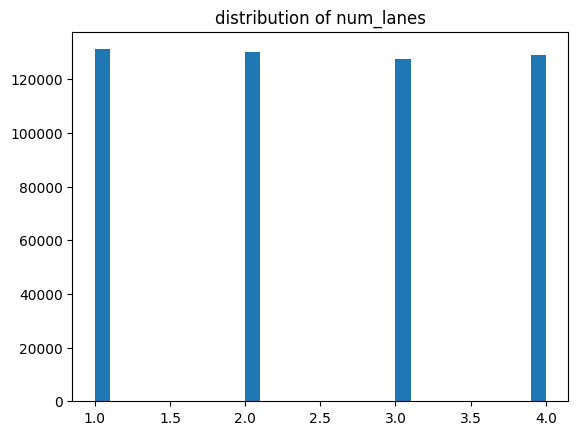

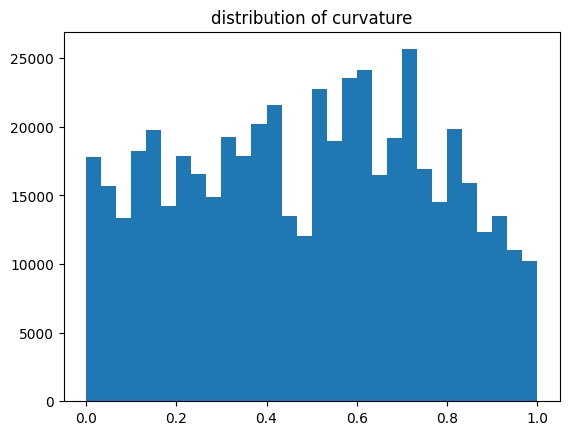

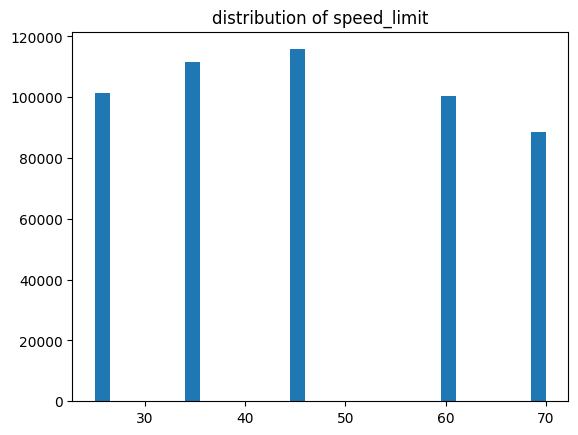

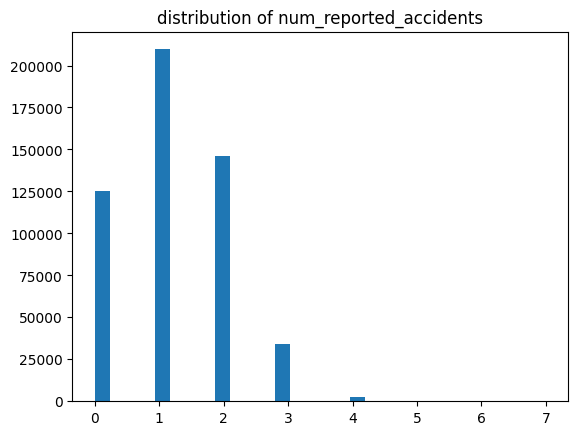

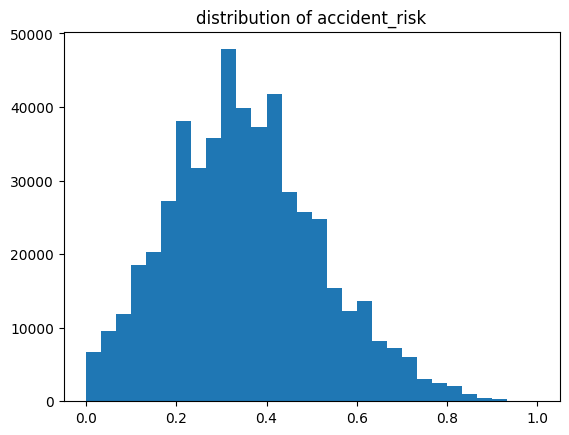

In [167]:
for col in numerical_cols:
    plt.Figure(figsize=(5, 3))
    plt.hist(df[col], bins=30)
    plt.title(f"distribution of {col}")
    plt.show()

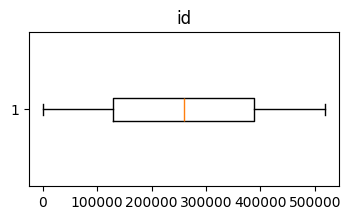

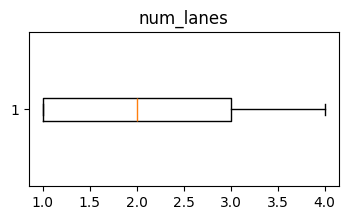

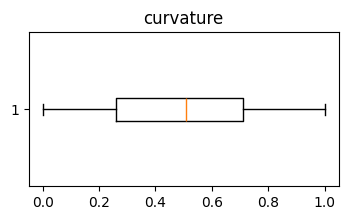

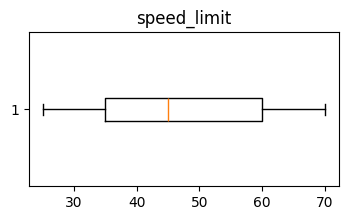

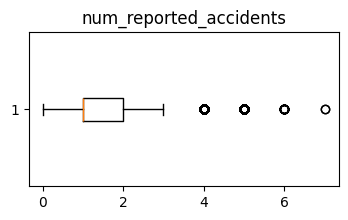

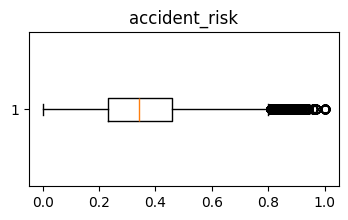

In [168]:
for col in numerical_cols:
    plt.figure(figsize=(4,2))
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()


In [169]:
# univariate analysis of categorical columns
for col in categorical_cols:
    print(df[col].value_counts())
    print("-" * 40)

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
----------------------------------------
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
----------------------------------------
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
----------------------------------------
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
----------------------------------------


In [171]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 40)


road_type
highway    33.543343
rural      33.359279
urban      33.097378
Name: proportion, dtype: float64
----------------------------------------
lighting
dim         35.504506
daylight    34.382158
night       30.113336
Name: proportion, dtype: float64
----------------------------------------
weather
foggy    35.048112
clear    34.631505
rainy    30.320384
Name: proportion, dtype: float64
----------------------------------------
time_of_day
morning      33.492740
evening      33.382069
afternoon    33.125191
Name: proportion, dtype: float64
----------------------------------------


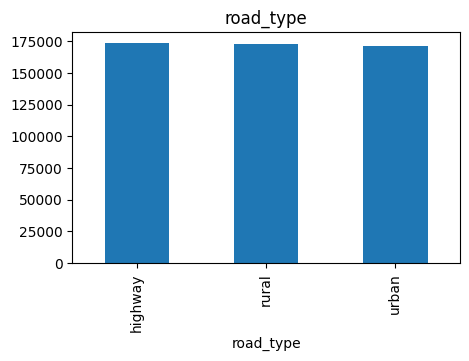

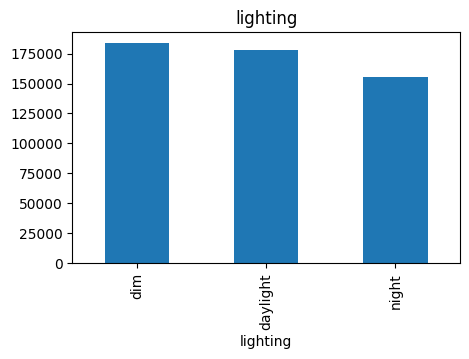

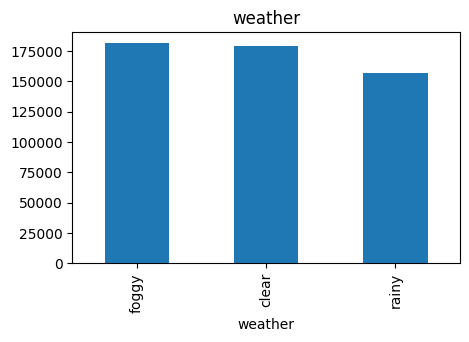

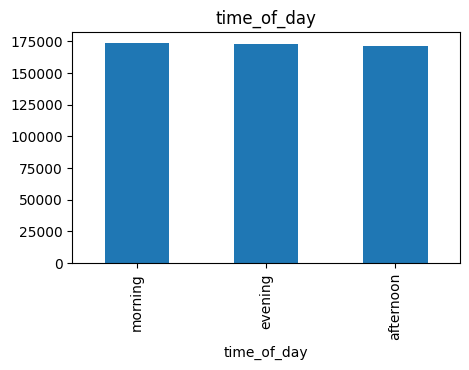

In [172]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(5,3))
    plt.title(col)
    plt.show()


In [173]:
df['accident_risk'].value_counts(normalize=True) * 100


accident_risk
0.34    3.001812
0.32    2.750341
0.37    2.598338
0.28    2.566277
0.39    2.414081
          ...   
0.94    0.009078
0.97    0.005408
0.96    0.005408
0.90    0.005022
0.93    0.004442
Name: proportion, Length: 98, dtype: float64

Summary Statistics for 'accident_risk':
count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

Percentage of records per risk range:
accident_risk
(-0.001, 0.1]     5.551285
(0.1, 0.2]       14.078307
(0.2, 0.3]       21.092063
(0.3, 0.4]       24.091943
(0.4, 0.5]       17.577073
(0.5, 0.6]        9.723923
(0.6, 0.7]        5.126180
(0.7, 0.8]        2.108917
(0.8, 0.9]        0.560691
(0.9, 1.0]        0.089618
Name: proportion, dtype: float64


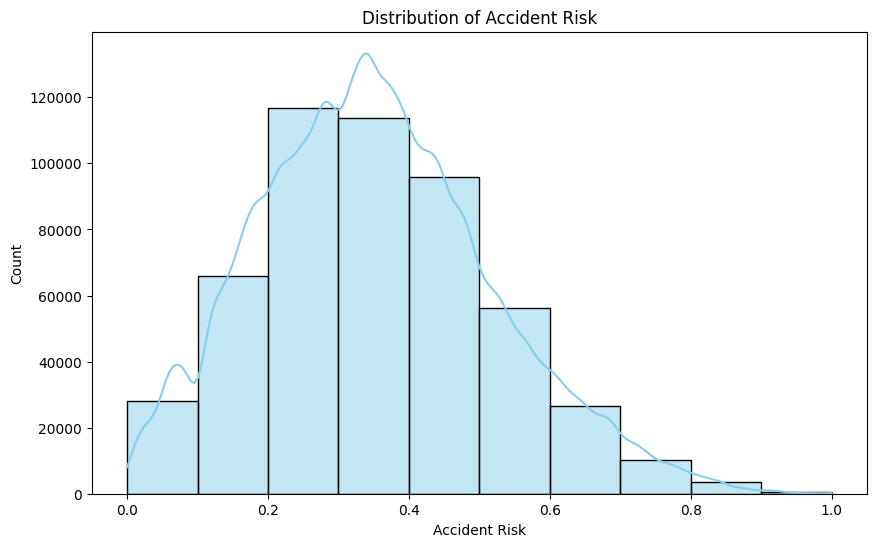

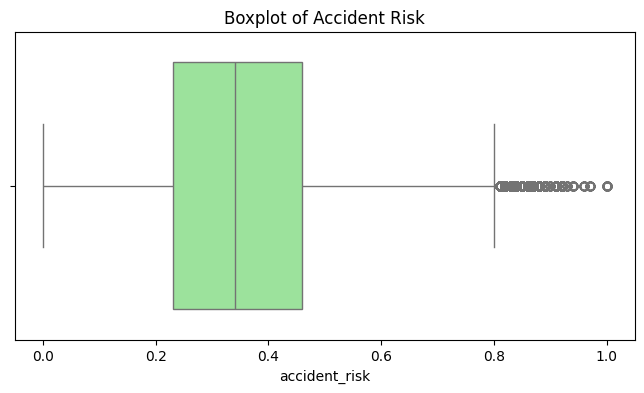

In [174]:

# Summary statistics
print("Summary Statistics for 'accident_risk':")
print(df['accident_risk'].describe())

# Distribution in bins (percentages)
# Bin into 10 intervals
risk_bins = pd.cut(df['accident_risk'], bins=10)
risk_distribution = risk_bins.value_counts(normalize=True) * 100
print("\nPercentage of records per risk range:")
print(risk_distribution.sort_index())

# Histogram (visual distribution)
plt.figure(figsize=(10,6))
sns.histplot(df['accident_risk'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Accident Risk')
plt.xlabel('Accident Risk')
plt.ylabel('Count')
plt.show()

# Boxplot (to check outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['accident_risk'], color='lightgreen')
plt.title('Boxplot of Accident Risk')
plt.show()
